#Data

In [ ]:
import pandas as pd
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data = pd.read_csv('/content/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### Prepraing data for trainig process

In [ ]:
x = data.drop(columns=['Age','Drug'],axis=1)
y = data['Drug']
x.head()

,Sex,BP,Cholesterol,Na_to_K
0,F,HIGH,HIGH,25.355
1,M,LOW,HIGH,13.093
2,M,LOW,HIGH,10.114
3,F,NORMAL,HIGH,7.798
4,F,LOW,HIGH,18.043


In [ ]:
y.isnull().sum(),x.isnull().sum()

(0,
 Sex            0
 BP             0
 Cholesterol    0
 Na_to_K        0
 dtype: int64)

In [ ]:
df_encoded = pd.get_dummies(x, columns=['BP','Cholesterol','Sex']).astype('int')

x=df_encoded.drop(columns=['Sex_F','Cholesterol_HIGH','BP_NORMAL'],axis=1)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
x

,Na_to_K,BP_HIGH,BP_LOW,Cholesterol_NORMAL,Sex_M
0,25,1,0,0,0
1,13,0,1,0,1
2,10,0,1,0,1
3,7,0,0,0,0
4,18,0,1,0,0
...,...,...,...,...,...
195,11,0,1,0,0
196,12,0,1,0,1
197,9,0,0,0,1
198,14,0,0,1,1


# Splitting data 7:3 and scaling it

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train = scale.fit_transform(X_train)
x_test = scale.fit(X_test)
# y_train = scale.fit_transform(y_train)
# y_test = scale.fit(y_test)
x_test

StandardScaler()

# SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

### Cross validation of SVC

In [ ]:
svc_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(), svc_param_grid, refit=True, verbose=3, cv=5)
svc_grid.fit(X_train, y_train)

print("Best parameters for SVM:", svc_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.464 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

In [ ]:
svc_best = svc_grid.best_estimator_
y_pred_svc_grid = svc_best.predict(X_test)

accuracy_svc_grid = accuracy_score(y_test, y_pred_svc_grid)
precision_svc_grid = precision_score(y_test, y_pred_svc_grid, average='weighted')
recall_svc_grid = recall_score(y_test, y_pred_svc_grid, average='weighted')
f1_svc_grid = f1_score(y_test, y_pred_svc_grid, average='weighted')

In [ ]:
print("\nSVM Classifier with GridSearchCV Metrics:")
print("Accuracy:", accuracy_svc_grid)
print("Precision:", precision_svc_grid)
print("Recall:", recall_svc_grid)
print("F1-score:", f1_svc_grid)


SVM Classifier with GridSearchCV Metrics:
Accuracy: 0.9
Precision: 0.9
Recall: 0.9
F1-score: 0.9


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


### Cross validation of Decision Tree

In [ ]:
dt_param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=0), dt_param_grid, refit=True, verbose=3, cv=5)
dt_grid.fit(X_train, y_train)

print("\nBest parameters for Decision Tree:", dt_grid.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....criterion=gini, max_depth=None;, score=0.857 total time=   0.0s
[CV 2/5] END ....criterion=gini, max_depth=None;, score=0.893 total time=   0.0s
[CV 3/5] END ....criterion=gini, max_depth=None;, score=0.893 total time=   0.0s
[CV 4/5] END ....criterion=gini, max_depth=None;, score=0.929 total time=   0.0s
[CV 5/5] END ....criterion=gini, max_depth=None;, score=0.893 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.857 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.893 total time=   0.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.893 total time=   0.0s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.929 total time=   0.0s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.893 total time=   0.0s
[CV 1/5] END ......criterion=gini, max_depth=20;, score=0.857 total time=   0.0s
[CV 2/5] END ......criterion=gini, max_depth=20;

In [ ]:
dt_best = dt_grid.best_estimator_
y_pred_dt_grid = dt_best.predict(X_test)

accuracy_dt_grid = accuracy_score(y_test, y_pred_dt_grid)
precision_dt_grid = precision_score(y_test, y_pred_dt_grid, average='weighted')
recall_dt_grid = recall_score(y_test, y_pred_dt_grid, average='weighted')
f1_dt_grid = f1_score(y_test, y_pred_dt_grid, average='weighted')


In [ ]:
print("\nDecision Tree Classifier with GridSearchCV Metrics:")
print("Accuracy:", accuracy_dt_grid)
print("Precision:", precision_dt_grid)
print("Recall:", recall_dt_grid)
print("F1-score:", f1_dt_grid)


Decision Tree Classifier with GridSearchCV Metrics:
Accuracy: 0.9333333333333333
Precision: 0.9111111111111111
Recall: 0.9333333333333333
F1-score: 0.9208333333333333


# Comparrison between the 2 model (performance)

In [ ]:
# Print evaluation metrics for SVM classifier with GridSearchCV
print("SVM Classifier with GridSearchCV:")
print("Accuracy: {:.2f}".format(accuracy_svc_grid))
print("Precision: {:.2f}".format(precision_svc_grid))
print("Recall: {:.2f}".format(recall_svc_grid))
print("F1-score: {:.2f}".format(f1_svc_grid))

# Print evaluation metrics for Decision Tree classifier with GridSearchCV
print("\nDecision Tree Classifier with GridSearchCV:")
print("Accuracy: {:.2f}".format(accuracy_dt_grid))
print("Precision: {:.2f}".format(precision_dt_grid))
print("Recall: {:.2f}".format(recall_dt_grid))
print("F1-score: {:.2f}".format(f1_dt_grid))


SVM Classifier with GridSearchCV:
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1-score: 0.90

Decision Tree Classifier with GridSearchCV:
Accuracy: 0.93
Precision: 0.91
Recall: 0.93
F1-score: 0.92


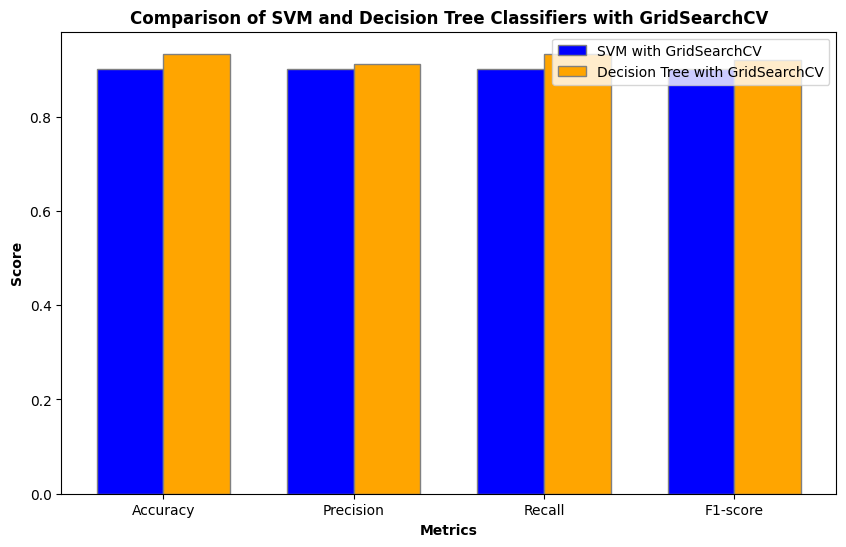

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and scores for SVM and Decision Tree classifiers after hyperparameter tuning
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_scores_grid = [accuracy_svc_grid, precision_svc_grid, recall_svc_grid, f1_svc_grid]
dt_scores_grid = [accuracy_dt_grid, precision_dt_grid, recall_dt_grid, f1_dt_grid]

# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Create grouped bar plot for classifiers after hyperparameter tuning
plt.figure(figsize=(10, 6))
plt.bar(r1, svm_scores_grid, color='blue', width=bar_width, edgecolor='grey', label='SVM with GridSearchCV')
plt.bar(r2, dt_scores_grid, color='orange', width=bar_width, edgecolor='grey', label='Decision Tree with GridSearchCV')

# Add xticks and labels
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)

# Add y-axis label and title
plt.ylabel('Score', fontweight='bold')
plt.title('Comparison of SVM and Decision Tree Classifiers with GridSearchCV', fontweight='bold')

# Add legend
plt.legend()

# Show plot
plt.show()
